[View in Colaboratory](https://colab.research.google.com/github/bell-one/tf_colab/blob/master/MNIST_tf.ipynb)

In [0]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import random

In [8]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [0]:
nb_classes = 10 # 0~9
X = tf.placeholder(tf.float32, [None, 28*28])
Y = tf.placeholder(tf.float32, [None, nb_classes])
W = tf.Variable(tf.random_normal([28*28, nb_classes]))
b = tf.Variable(tf.random_normal([nb_classes]))

In [0]:
hypo = tf.nn.softmax(tf.matmul(X,W)+b)
cost = tf.reduce_mean(-tf.reduce_sum(Y*tf.log(hypo), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

In [0]:
# test model, accuracy
is_correct = tf.equal(tf.argmax(hypo, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

Epoch: 0001 cost =  3.280957975
Accuracy:  0.7474
Label: [6]
Prediction: [6]


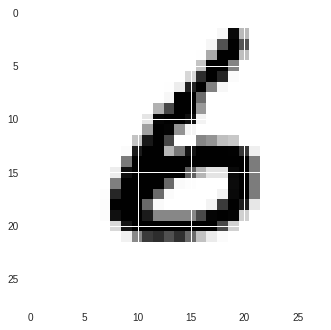

Epoch: 0002 cost =  1.119288864
Accuracy:  0.8146
Label: [6]
Prediction: [6]


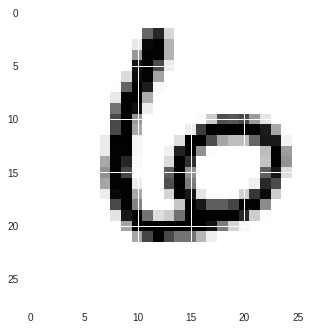

Epoch: 0003 cost =  0.867419147
Accuracy:  0.8407
Label: [0]
Prediction: [0]


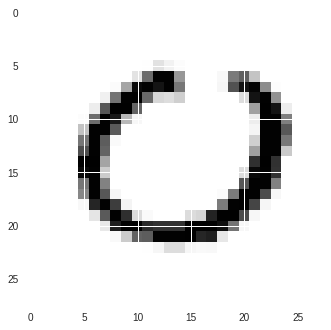

Epoch: 0004 cost =  0.748842278
Accuracy:  0.8552
Label: [1]
Prediction: [1]


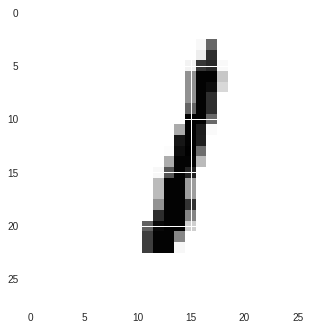

Epoch: 0005 cost =  0.677691991
Accuracy:  0.8641
Label: [5]
Prediction: [5]


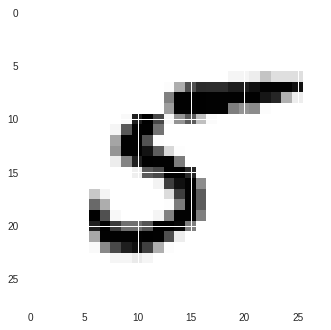

Epoch: 0006 cost =  0.628312732
Accuracy:  0.8719
Label: [1]
Prediction: [1]


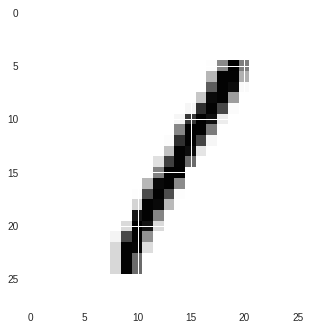

Epoch: 0007 cost =  0.591763881
Accuracy:  0.8737
Label: [5]
Prediction: [5]


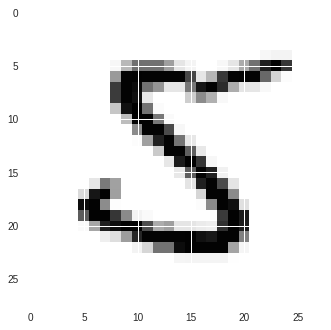

Epoch: 0008 cost =  0.563642564
Accuracy:  0.8771
Label: [1]
Prediction: [1]


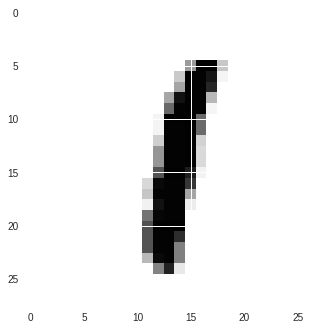

Epoch: 0009 cost =  0.538797618
Accuracy:  0.8792
Label: [7]
Prediction: [7]


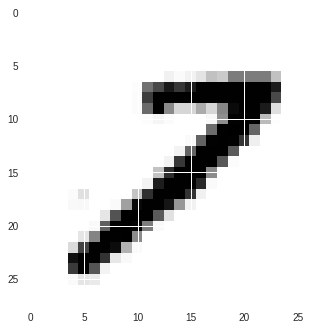

Epoch: 0010 cost =  0.520465140
Accuracy:  0.8826
Label: [0]
Prediction: [0]


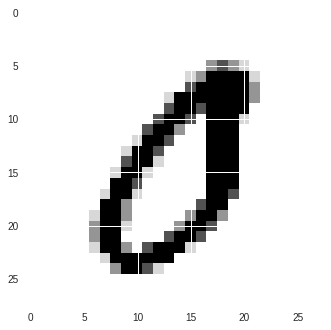

Epoch: 0011 cost =  0.503098041
Accuracy:  0.8848
Label: [8]
Prediction: [8]


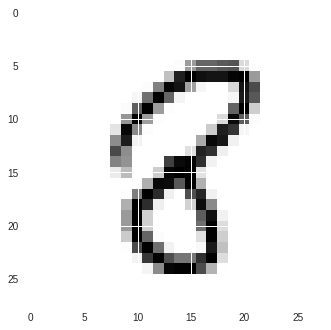

Epoch: 0012 cost =  0.490514024
Accuracy:  0.8863
Label: [4]
Prediction: [4]


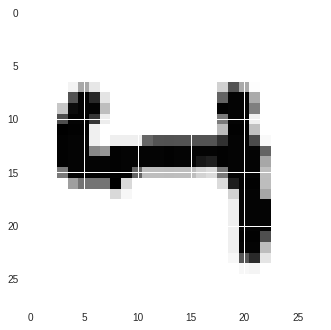

Epoch: 0013 cost =  0.475926927
Accuracy:  0.8888
Label: [0]
Prediction: [0]


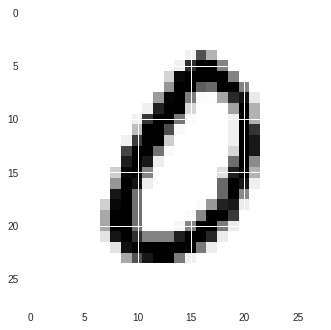

Epoch: 0014 cost =  0.466849716
Accuracy:  0.8892
Label: [0]
Prediction: [0]


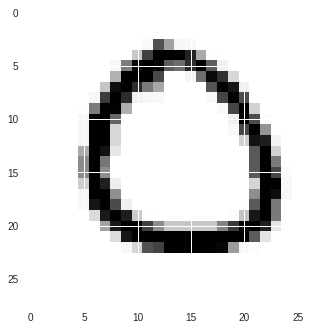

Epoch: 0015 cost =  0.455657291
Accuracy:  0.8904
Label: [4]
Prediction: [4]


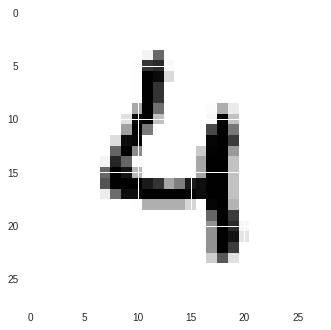

In [25]:
# graph params, launch graph
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
      batch_xs, batch_ys = mnist.train.next_batch(batch_size)
      c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys})
      avg_cost += c / total_batch
    print('Epoch:', '%04d' % (epoch + 1), 'cost = ', '{:.9f}'.format(avg_cost))
    r = random.randint(0, mnist.test.num_examples-1)
    print("Accuracy: ", accuracy.eval(session=sess, feed_dict={X: mnist.test.images, Y : mnist.test.labels}))
    print("Label:", sess.run(tf.argmax(mnist.test.labels[r:r+1],1)))
    print("Prediction:", sess.run(tf.argmax(hypo, 1), feed_dict={X: mnist.test.images[r:r+1]}))
    plt.imshow(mnist.test.images[r:r+1].reshape(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()